In [1]:
import numpy as np
import os
import glob
import pandas as pd
parent_dir_path=os.path.abspath( os.path.join(os.getcwd(),'..')) 

In [2]:
main_direct=parent_dir_path+'/demos/'
ana_mr_39=np.loadtxt(main_direct+'ana_mr_39.txt')
ana_pran_39=np.loadtxt(main_direct+'ana_pran_39.txt')
phe_mr_39=np.loadtxt(main_direct+'phenom_mr_modify_n39.txt')
phe_pran_39=np.loadtxt(main_direct+'phe_pran.txt')
obs_mr_53=np.loadtxt(main_direct+'mr_obs_53.txt')
mr_all_info=pd.read_csv(main_direct+'39_mr_all_info.csv')
obs_mr_39=obs_mr_53[0:39*10000]

In [3]:
ana_pran=np.zeros(39)
for i in range(39):
    ana_pran[i]=np.mean( ana_pran_39[i*10000:(i+1)*10000] )

In [4]:
mr_39_part1=np.zeros((39,2))
mr_39_part1[:,0]=ana_pran
mr_39_part1[:,1]=phe_pran_39
df_mr_39_part1=pd.DataFrame(mr_39_part1,columns=['p0ana','p0phe'])
df_mr_39_all=pd.concat((mr_all_info,df_mr_39_part1),axis=1)
df_mr_39_partinfo=df_mr_39_all[['Pname','P0','p0ana','p0phe']]

In [5]:
pnames=['J0514$-$4002A', 'J1829+2456' ,'B1534+12' ,'J0737$-$3039A' ,'J0509+3801',
 'J1757$-$1854', 'J1756$-$2251' ,'B2127+11C', 'J1807$-$2500B','B1913+16',
 'J0453+1559' ,'J1913+1102' ,'J1802$-$2124', 'J2045+3633' ,'J1918$-$0642',
 'J1910$-$5959A' ,'J1949+3106' ,'J1713+0747' ,'J2234+0611' ,'J2043+1711',
 'J2053+4650' ,'J0337+1715' ,'J0437$-$4715', 'J1738+0333' ,'J1909$-$3744',
 'J1950+2414' ,'J1125$-$6014' ,' J1857+0943' ,'J0751+1807' ,'J0955$-$6150',
 'J1012+5307' ,'J1600$-$3053' ,'J1946+3417' ,'J2222$-$0137' ,'J1614$-$2230',
 'J0348+0432' ,'J0740+6620' ,'J1903+0327' ,'J0030+0451']
sort_mr_indexs=[12,  0, 13, 14,  1, 15,  2,  3,  4, 16,  5,  6, 17, 18,  7,  8, 19,
       20, 21,  9, 38, 22, 23, 24, 25, 26, 27, 10, 11, 28, 37, 29, 30, 31,
       32, 33, 34, 35, 36] 
#(df_mr_39_all.sort_values(['mr']) ).index

# plot

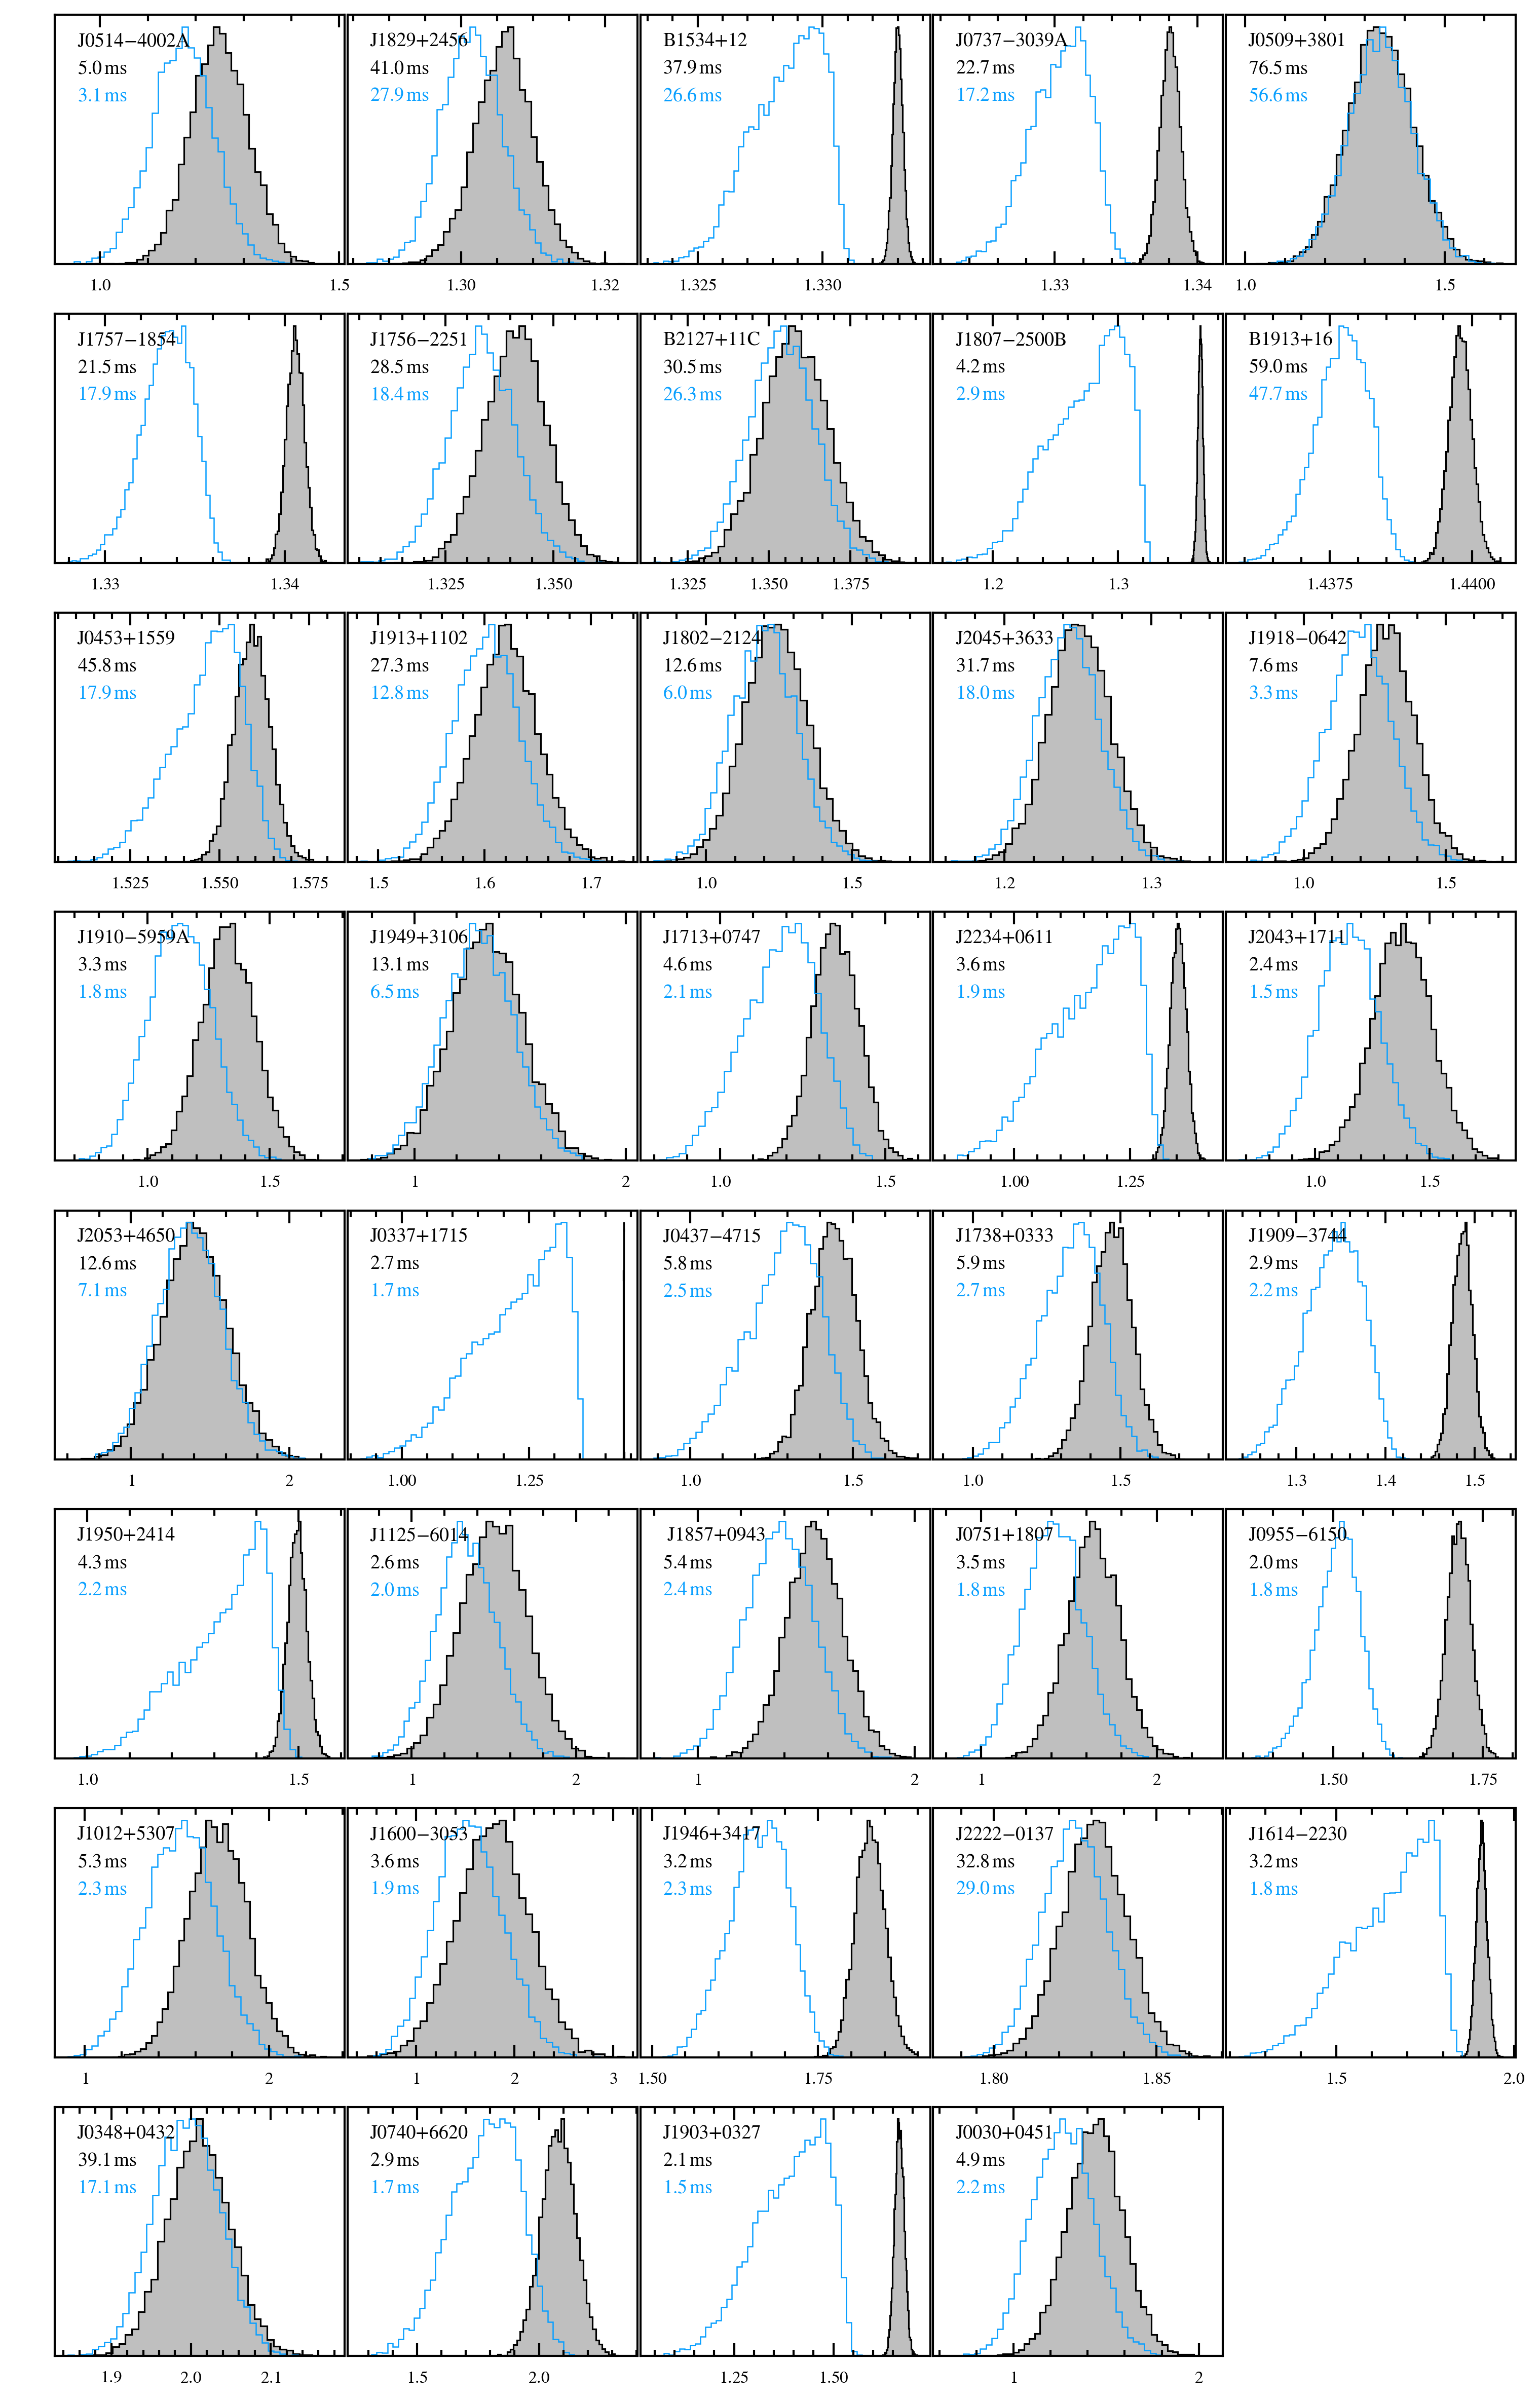

In [15]:
import corner.corner
import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

#tau=np.loadtxt('cal_li_percent.txt')
li=abs(phe_mr_39)
obs=abs(obs_mr_39)
spin_up=abs(ana_mr_39)

from decimal import Decimal 

data_id = sort_mr_indexs

for i in sort_mr_indexs:
    label_names=pnames[i]
    plt.rcParams["figure.figsize"] = (6.2,10)
    plt.subplot(8,5,i+1)
    
    p0_lab=format(df_mr_39_partinfo['P0'][i]*1000 , '.1f')
    p0_li_percent=format(df_mr_39_partinfo['p0phe'][i]*1000, '.1f')
    p0_m_ana=format(df_mr_39_partinfo['p0ana'][i]*1000 , '.1f')
    
    plt.grid(False)
    
    fre_num_oran, x_edge_oran = np.histogram(obs[i*10000 : (i+1)*10000 ],bins=40)
        
    plt.stairs(fre_num_oran/np.max(fre_num_oran),x_edge_oran,color='grey',fill=True,alpha=0.5,ls='-') 
    plt.stairs(fre_num_oran/np.max(fre_num_oran),x_edge_oran,color='k',fill=0,alpha=1,ls='-',lw=0.38) 
    plt.stairs(fre_num_oran/np.max(fre_num_oran),x_edge_oran,color='k',lw=0.001,alpha=0.001,ls='-',label=r'{}'.format(pnames[i])) 
    plt.stairs(fre_num_oran/np.max(fre_num_oran),x_edge_oran,color='k',lw=0.001,alpha=0.00,ls='-',label=r'${}\,\rm ms$'.format( p0_lab)) 
    
    #fre_num_li, x_edge_li = np.histogram(li[i*10000 : (i+1)*10000 ],bins=40)
    #plt.stairs(fre_num_li/np.max(fre_num_li),x_edge_li,color='#ff7f0e',lw=0.3,ls='-') 
    #plt.stairs(fre_num_li/np.max(fre_num_li),x_edge_li,color='#ff7f0e',lw=0.001,alpha=0.00,ls='-',label=r'${}\,\rm ms$'.format( p0_li_percent))
    
    fre_num_spin_up, x_edge_spin_up = np.histogram(spin_up[i*10000 : (i+1)*10000 ],bins=40)
    plt.stairs(fre_num_spin_up/np.max(fre_num_spin_up),x_edge_spin_up,color='#089FFF',lw=0.3,ls='-')
    plt.stairs(fre_num_spin_up/np.max(fre_num_spin_up),x_edge_spin_up,color='#089FFF',lw=0.001,alpha=0.00,ls='-',label=r'${}\,\rm ms$'.format( p0_m_ana) )
    
    
    plt.xticks(fontsize=4)
    plt.yticks(fontsize=4)
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.01)

            
    plt.legend(loc='upper left',labelcolor=['black','black','#089FFF'],frameon=0,bbox_to_anchor=(-0.17,1),fontsize=4.6)
plt.savefig(parent_dir_path+'/figures/fig1.jpg')
plt.show()

# figures6 spin period and mass

In [7]:
#Pname	mr	mrerr	ms	mserr	P0
obs_39mr_err=df_mr_39_all['mrerr']
obs_39mr_mean=df_mr_39_all['mr']
obs_39p_mean=df_mr_39_all['P0']*1000

phe_39pran_mean=phe_pran_39*1000
phe_39pran_err=(np.loadtxt(main_direct+'phe_pran_err.txt') ) * 1000
phe_39mr_err=np.zeros(39)
phe_39mr_mean=np.zeros(39)
for i in range(39):
    phe_39mr_err[i]=np.std(phe_mr_39[i*10000:(i+1)*10000])
    phe_39mr_mean[i]=np.mean(phe_mr_39[i*10000:(i+1)*10000])

In [8]:
ana_pran39=(np.loadtxt(main_direct+'ana_pran_39.txt') ) * 1000
ana_39p_mean=np.zeros(39)
ana_39p_err =np.zeros(39)
for i in range(39):
    ana_39p_err[i]=np.std(ana_pran39[i*10000:(i+1)*10000])*0.9

In [9]:
obs_39mr_err=df_mr_39_all['mrerr']
obs_39mr_mean=df_mr_39_all['mr']
obs_39p_mean=df_mr_39_all['P0']*1000

ana_p0_mean=df_mr_39_partinfo['p0ana']*1000

phe_39pran_mean=ana_p0_mean
phe_39pran_err =ana_39p_err
phe_39mr_err=np.zeros(39)
phe_39mr_mean=np.zeros(39)
for i in range(39):
    phe_39mr_err[i]=np.std(ana_mr_39[i*10000:(i+1)*10000])
    phe_39mr_mean[i]=np.mean(ana_mr_39[i*10000:(i+1)*10000])

In [10]:
import bilby
import os
import glob
import numpy as np
from scipy import interpolate
import corner.corner
import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


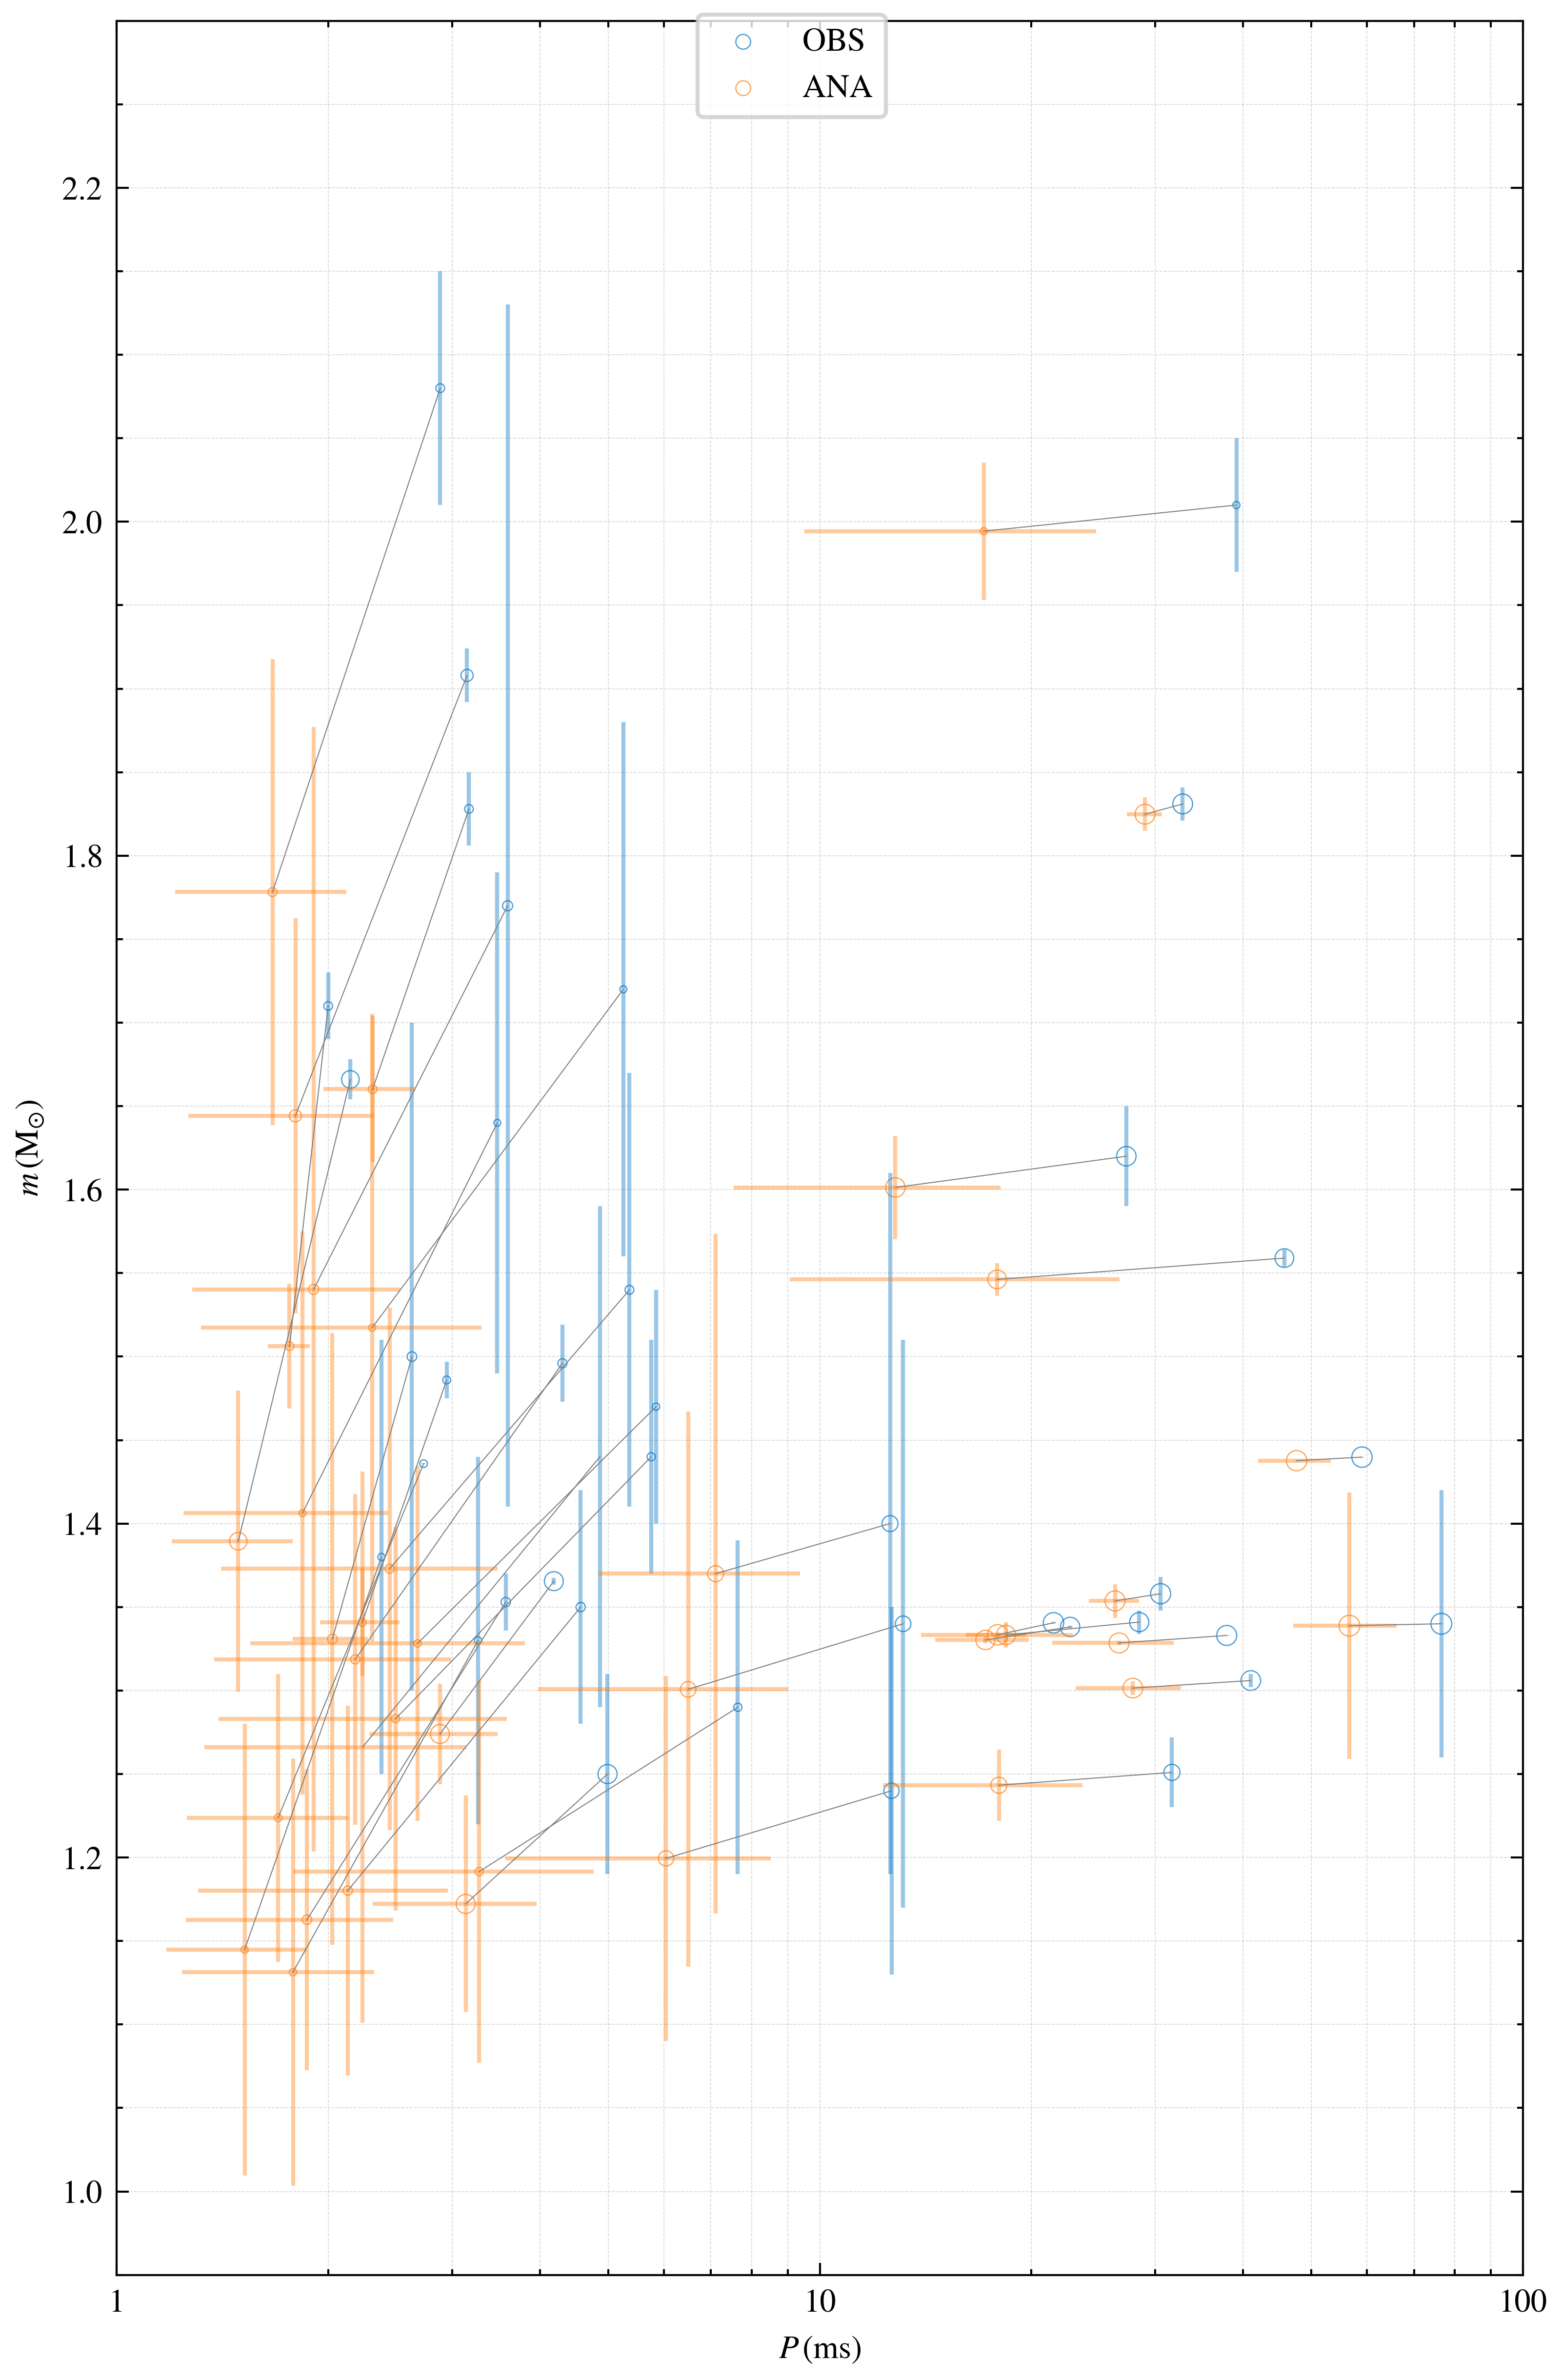

In [16]:
a_x_p_mean=obs_39p_mean
a_y_m_mean=obs_39mr_mean
a_y_m_err=obs_39mr_err

b_x_p_mean=phe_39pran_mean
b_y_m_mean=phe_39mr_mean
b_x_p_err =phe_39pran_err
b_y_m_err =phe_39mr_err
sv=df_mr_39_all['ms']*18


plt.grid(which='both',linestyle='--',lw=0.2,alpha=0.5)

plt.scatter(a_x_p_mean, a_y_m_mean, lw=0.3,marker="o", s=sv,edgecolors='#0072c1',facecolor='none',alpha=0.7,label=r'$\rm{OBS}$')
plt.scatter(b_x_p_mean,b_y_m_mean, lw=0.3, marker="o", s=sv,edgecolors='#ff7f0e',facecolor='none',alpha=0.7,label=r'$\rm{ANA}$')


plt.errorbar(a_x_p_mean, a_y_m_mean, yerr=a_y_m_err, xerr=None, marker="o", ms=0.01,color='#0072c1',alpha=0.4,linestyle="none")


plt.errorbar(b_x_p_mean, b_y_m_mean,xerr=b_x_p_err, yerr=b_y_m_err, marker="o",ms=0.01, color='#ff7f0e',alpha=0.4,linestyle="none")

for i in range(len(a_x_p_mean)):
    plt.plot([a_x_p_mean[i],b_x_p_mean[i]],[a_y_m_mean[i],b_y_m_mean[i]],
             linewidth=0.25,ls='-',color='grey',alpha=1)
    
plt.legend(frameon=1,loc='upper center',bbox_to_anchor=(0.48, 1.01))
plt.plot(a_x_p_mean, a_y_m_mean,lw=0.0,alpha=0)

plt.xscale('log')

locs, labels = plt.xticks()    
print(locs)
plt.xticks([1.e+0, 1.e+1, 1.e+2 ],['1','10','100'])

plt.xlim(1,100)
plt.ylim(0.95,2.3)
plt.xlabel(r'$P\,(\rm{ms})$')
plt.ylabel(r'$m\,(\rm{M_{\odot}})$')

plt.savefig(parent_dir_path+'/figures/extended_fig7_up.jpg')
plt.show()

# luminosity vs m figure

In [12]:
import bilby
import os
import glob
import numpy as np
from scipy import interpolate
import corner.corner
#import scienceplots
import pandas as pd
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

In [13]:
dns_table=pd.read_excel(parent_dir_path+'/NSmassData/flux_vs_mass/flux_DNS_mass.xlsx')
ns_x_table1=pd.read_excel(parent_dir_path+'/NSmassData/flux_vs_mass/flux_NSmass_mr_ms.xlsx',sheet_name='Sheet1')
ns_x_table2=pd.read_excel(parent_dir_path+'/NSmassData/flux_vs_mass/flux_NSmass_mr_ms.xlsx',sheet_name='Sheet2')

dns_tem=list()
for i in range(len(dns_table['s1400'])):
    m_l=np.zeros(4)
    if dns_table['s1400'][i] != 0:
        a_temp= ( np.random.normal( dns_table['dl'][i], dns_table['dl'][i]*0.2, 10000 ) )**2*np.random.normal( dns_table['s1400'][i], dns_table['es'][i], 10000 ) 
        m_l[0]=dns_table['mr'][i]
        m_l[1]=dns_table['mrerr'][i]
        m_l[2]=np.mean(a_temp)
        m_l[3]=np.std(a_temp)
        dns_tem.append(m_l)

ns_x_tem1=list()
for i in range(len(ns_x_table1['s1400'])):
    m_l=np.zeros(4)
    if ns_x_table1['s1400'][i] != 0:
        b_temp= ( np.random.normal( ns_x_table1['dl'][i], ns_x_table1['dl'][i]*0.2, 10000 ) )**2*np.random.normal( ns_x_table1['s1400'][i], ns_x_table1['es'][i], 10000 ) 
        m_l[0]=ns_x_table1['mNS'][i]
        m_l[1]=ns_x_table1['mNSerror'][i]
        m_l[2]=np.mean(b_temp)
        m_l[3]=np.std(b_temp)
        ns_x_tem1.append(m_l)
ns_x_tem2=list()
for i in range(len(ns_x_table2['s1400'])):
    m_l=np.zeros(4)
    if ns_x_table2['s1400'][i] != 0:
        c_temp= ( np.random.normal( ns_x_table2['dl'][i], ns_x_table2['dl'][i]*0.2, 10000 ) )**2*np.random.normal( ns_x_table2['s1400'][i], ns_x_table2['es'][i], 10000 ) 
        m_l[0]=ns_x_table2['mNS'][i]
        m_l[1]=ns_x_table2['mNSerror'][i]
        m_l[2]=np.mean(c_temp)
        m_l[3]=np.std(c_temp)
        ns_x_tem2.append(m_l)
m_l_tem=dns_tem + ns_x_tem1 + ns_x_tem2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


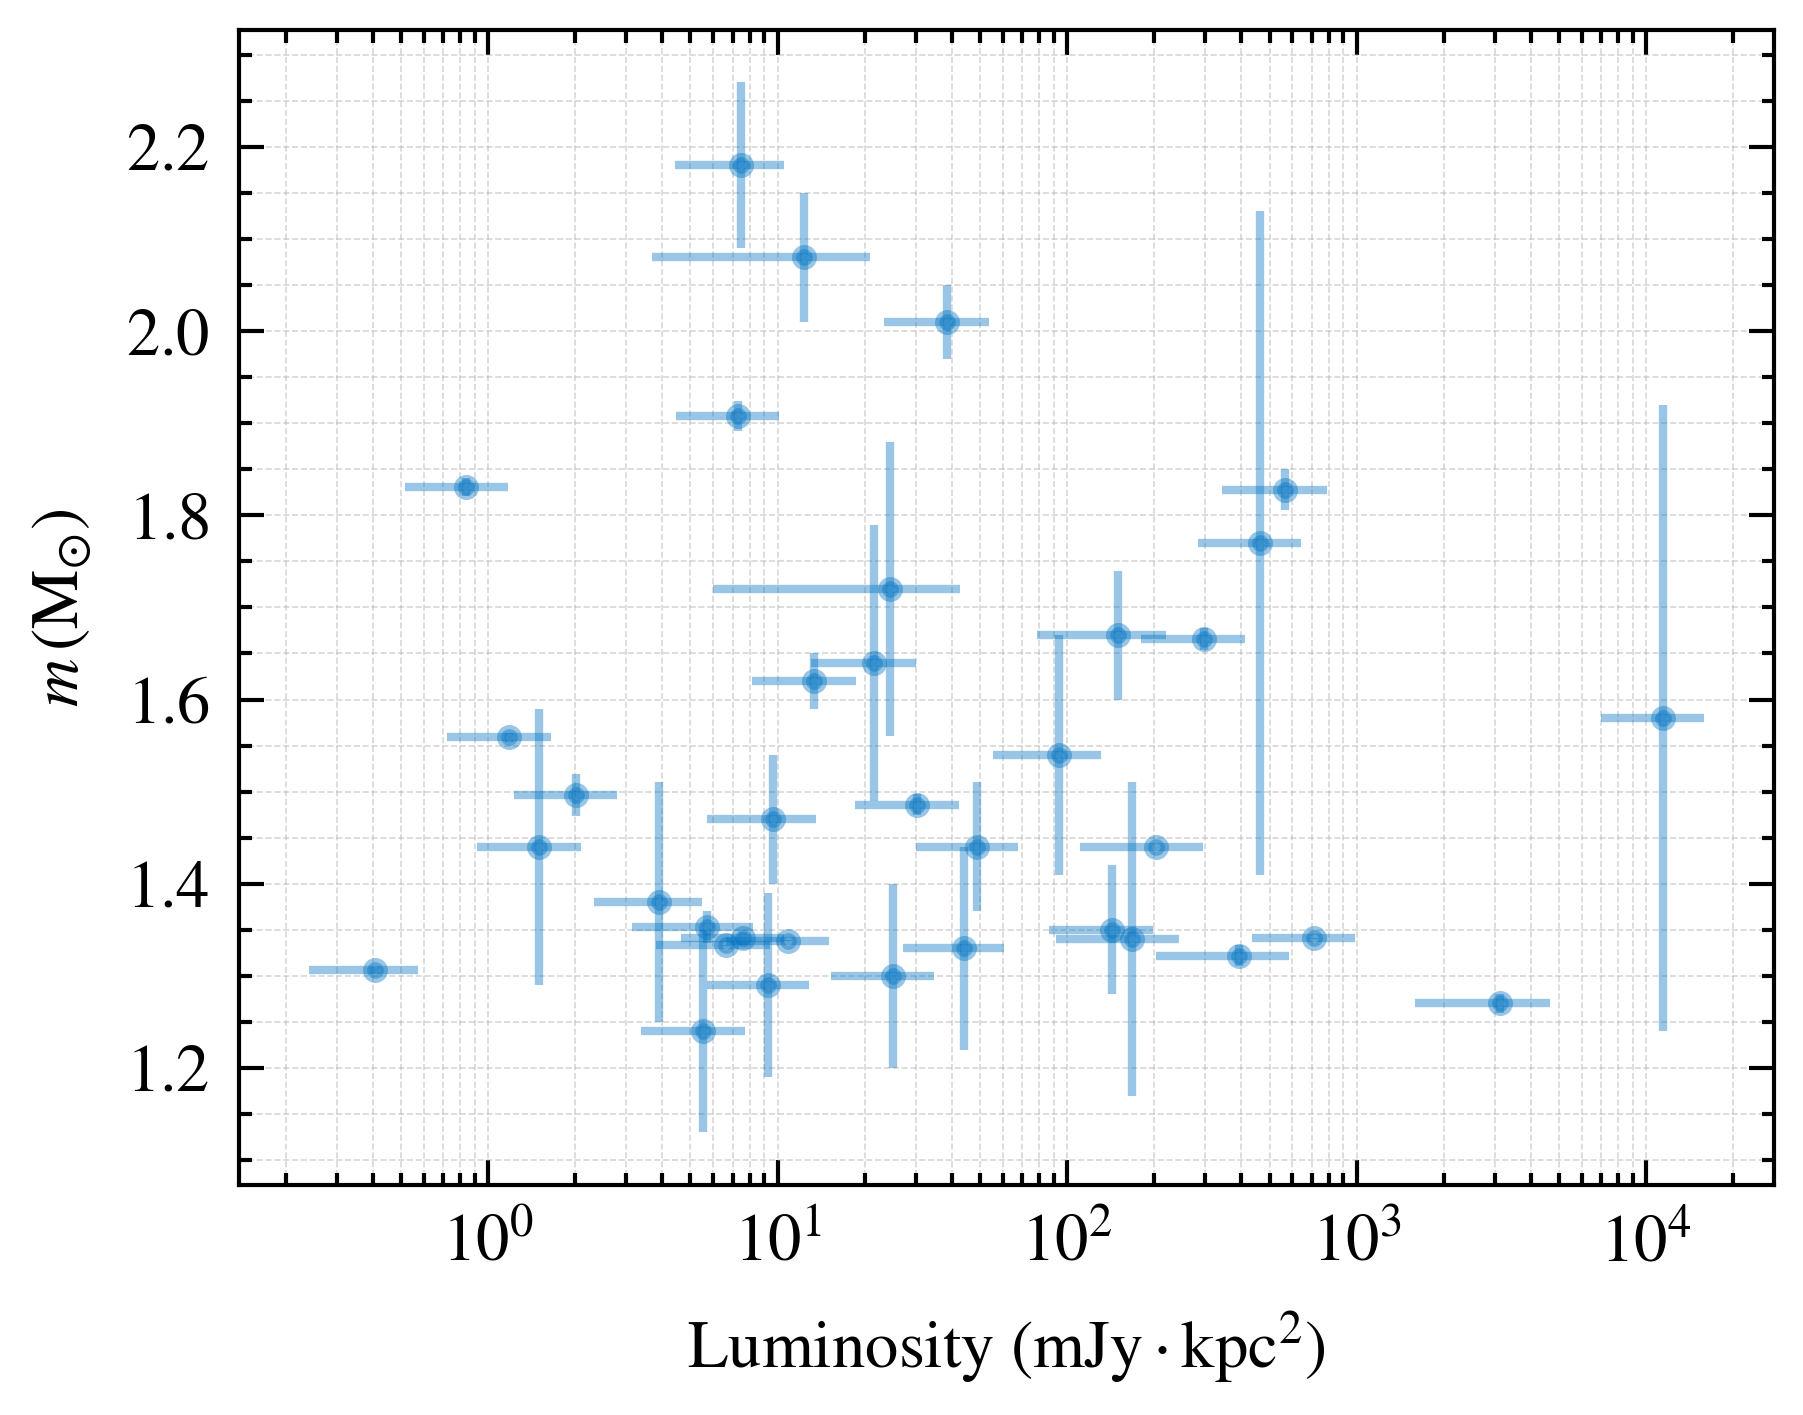

In [14]:
yval = np.array(m_l_tem)[:,0]
xval = np.array(m_l_tem)[:,2]  *4*np.pi
yerr1 = np.array(m_l_tem)[:,1]
xerr1 = np.array(m_l_tem)[:,3]  *4*np.pi
plt.grid( which='both',linestyle='--',lw=0.2,alpha=0.5)

plt.errorbar(xval, yval, xerr= xerr1, yerr=yerr1, marker="o", ms=2,color='#0072c1',alpha=0.4,linestyle="none")

#plt.scatter(xval[2],yval[2],s=5,marker='o',c='r',label=r'$\rm J0737-3039A$')
#plt.scatter(xval[5],yval[5],s=5,marker='o',c='green',label=r'$\rm B1913+16$')
#plt.scatter(xval[25],yval[25],s=5,marker='o',c='yellow',label=r'$\rm B2222-0137$')
plt.xscale('log')

plt.xlabel(r'$\rm Luminosity\,\,(mJy\cdot kpc^2)$')
plt.ylabel(r'$m\,(\rm{M_{\odot}})$')
plt.legend(frameon=0,loc='upper left',fontsize=6)
plt.savefig(parent_dir_path+'/figures/extended_fig7_down.jpg')
plt.show()